# Understanding Student Dropout Trends: An Exploratory Analysis

<img src="./drop_sc.png" alt="Image description" width="700">


## 1.Business Understanding


### This project delves into the multifaceted issue of student dropout rates, aiming to uncover the key factors that influence a student's decision to leave school prematurely. This analysis explores four dimensions including family factors, extracurricular activities, alcohol consumption, and educational support systems. Although utilizing synthetic data inspired by a Kaggle dataset, the methodologies demonstrated here—ranging from exploratory data analysis and statistical testing to predictive modeling—showcase a reproducible framework for educational data mining. By providing insights into the complex interplay of factors affecting student retention, this project could serve as a valuable resource for educators, policymakers, and researchers aiming to develop targeted


1. What Family Factors Contribute to Student Dropout Rates?
2. Do Extracurricular Activities Reduce the Likelihood of Dropping Out?
3. Does Access to Educational Support Systems Help Prevent Dropout?
4. How Does Alcohol Consumption Relate to Student Dropout?

## 2.Data Understanding

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")


%matplotlib inline

### Exploratory Data Analysis (EDA)

In [101]:
df = pd.read_csv('./student_data.csv')
df.head()

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,Reason_for_Choosing_School,Guardian,Travel_Time,Study_Time,Number_of_Failures,School_Support,Family_Support,Extra_Paid_Class,Extra_Curricular_Activities,Attended_Nursery,Wants_Higher_Education,Internet_Access,In_Relationship,Family_Relationship,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,School A,Female,13.0,Urban,1.0,Together,Primary,Secondary,Business,Healthcare,Reputation,Mother,14.0,5.0,0,No,Yes,Yes,No,No,Yes,No,Yes,Bad,5.0,4.0,Low,Low,Very Bad,1,16.0,14.0,16.0,Yes
1,School C,Female,14.0,Suburban,4.0,Apart,Higher,NaN,Service,Education,Course,Mother,7.0,4.0,0,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Very Bad,3.0,1.0,Very High,NaN,Good,3,15.0,16.0,15.0,No
2,School C,Female,18.0,Rural,5.0,Apart,NaN,Primary,Business,Unemployed,Course,Father,NaN,1.0,0,No,No,Yes,Yes,No,No,No,Yes,Bad,2.0,5.0,Very High,Medium,Excellent,0,17.0,13.0,8.0,Yes
3,School B,Other,18.0,Suburban,7.0,Apart,Secondary,Secondary,Business,Technology,Home,Other,41.0,4.0,1,No,No,Yes,No,Yes,Yes,No,Yes,Good,5.0,NaN,Low,NaN,Good,6,NaN,16.0,16.0,No
4,School A,Other,16.0,Suburban,8.0,Apart,Higher,NaN,Unemployed,Education,Other,Father,39.0,7.0,2,Yes,No,Yes,No,Yes,No,No,No,Very Bad,4.0,4.0,NaN,Low,Bad,2,16.0,13.0,15.0,No


In [41]:
print("This dataset has {} rows and {} columns".format(df.shape[0],df.shape[1]))

This dataset has 20000 rows and 34 columns


In [42]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School                       20000 non-null  object 
 1   Gender                       20000 non-null  object 
 2   Age                          18977 non-null  float64
 3   Address                      20000 non-null  object 
 4   Family_Size                  19008 non-null  float64
 5   Parental_Status              20000 non-null  object 
 6   Mother_Education             14876 non-null  object 
 7   Father_Education             14986 non-null  object 
 8   Mother_Job                   20000 non-null  object 
 9   Father_Job                   20000 non-null  object 
 10  Reason_for_Choosing_School   20000 non-null  object 
 11  Guardian                     20000 non-null  object 
 12  Travel_Time                  18990 non-null  float64
 13  Study_Time      

In [43]:
print("There are {} columns wiht missing data.".format(len((df.isnull().mean() * 100)[df.isnull().mean() * 100 > 0])))

There are 13 columns wiht missing data.


In [44]:
(df.isnull().mean() * 100)[df.isnull().mean() * 100 > 0]


Age                             5.115
Family_Size                     4.960
Mother_Education               25.620
Father_Education               25.070
Travel_Time                     5.050
Study_Time                      5.095
Free_Time                       5.230
Going_Out                       4.990
Weekend_Alcohol_Consumption    19.885
Weekday_Alcohol_Consumption    20.155
Grade_1                         5.050
Grade_2                         5.075
Final_Grade                     5.030
dtype: float64

### Visualizing the percentage of missing values in each column.

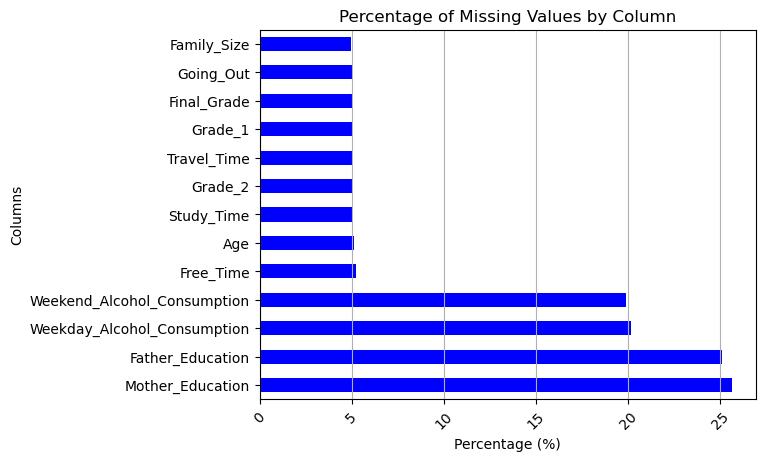

In [45]:
missing_percentage = (df.isnull().mean() * 100)[df.isnull().mean() * 100 > 0].sort_values(ascending=False)
missing_percentage.plot(kind='barh', color='blue')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Percentage (%)')
plt.ylabel('Columns')
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.show()

### Isolating categorical features

In [46]:
df.select_dtypes(include='object').columns

Index(['School', 'Gender', 'Address', 'Parental_Status', 'Mother_Education',
       'Father_Education', 'Mother_Job', 'Father_Job',
       'Reason_for_Choosing_School', 'Guardian', 'School_Support',
       'Family_Support', 'Extra_Paid_Class', 'Extra_Curricular_Activities',
       'Attended_Nursery', 'Wants_Higher_Education', 'Internet_Access',
       'In_Relationship', 'Family_Relationship', 'Weekend_Alcohol_Consumption',
       'Weekday_Alcohol_Consumption', 'Health_Status', 'Dropped_Out'],
      dtype='object')

In [47]:
print("At a first glance, there are {} categorical features.".format(len(df.select_dtypes(include='object').columns)))

At a first glance, there are 23 categorical features.


### Isolating quantitative features

In [48]:
df.select_dtypes(exclude='object').columns

Index(['Age', 'Family_Size', 'Travel_Time', 'Study_Time', 'Number_of_Failures',
       'Free_Time', 'Going_Out', 'Number_of_Absences', 'Grade_1', 'Grade_2',
       'Final_Grade'],
      dtype='object')

In [49]:
print("At a first glance, there are {} categorical features.".format(len(df.select_dtypes(exclude='object').columns)))

At a first glance, there are 11 categorical features.


### However Going_Out should be a categorical feature since it shows a scale of values.

In [102]:
df['Going_Out'] = df['Going_Out'].astype('str')

### Looking at summary satistics to identify possible anomalies within the quantitative features if any.

In [51]:
numeric_cols = df.select_dtypes(exclude='object').columns
df[numeric_cols].describe()

,Age,Family_Size,Travel_Time,Study_Time,Number_of_Failures,Free_Time,Number_of_Absences,Grade_1,Grade_2,Final_Grade
count,18977.000000,19008.000000,18990.000000,18981.000000,20000.000000,18954.000000,20000.000000,18990.000000,18985.000000,18994.000000
mean,15.486378,4.498580,19.581411,3.511828,0.152050,2.997679,2.507500,13.794892,13.786516,13.806202
std,1.527998,2.285508,20.036377,2.830779,0.418974,1.414174,2.991988,3.191949,3.206739,3.217748
min,10.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,2.000000
25%,14.000000,3.000000,5.000000,1.000000,0.000000,2.000000,0.000000,12.000000,12.000000,12.000000
50%,15.000000,5.000000,14.000000,3.000000,0.000000,3.000000,2.000000,14.000000,14.000000,14.000000
75%,17.000000,6.000000,27.000000,5.000000,0.000000,4.000000,4.000000,16.000000,16.000000,16.000000
max,21.000000,8.000000,245.000000,27.000000,5.000000,5.000000,30.000000,19.000000,19.000000,19.000000


### Visualizing the distribution of features of interest

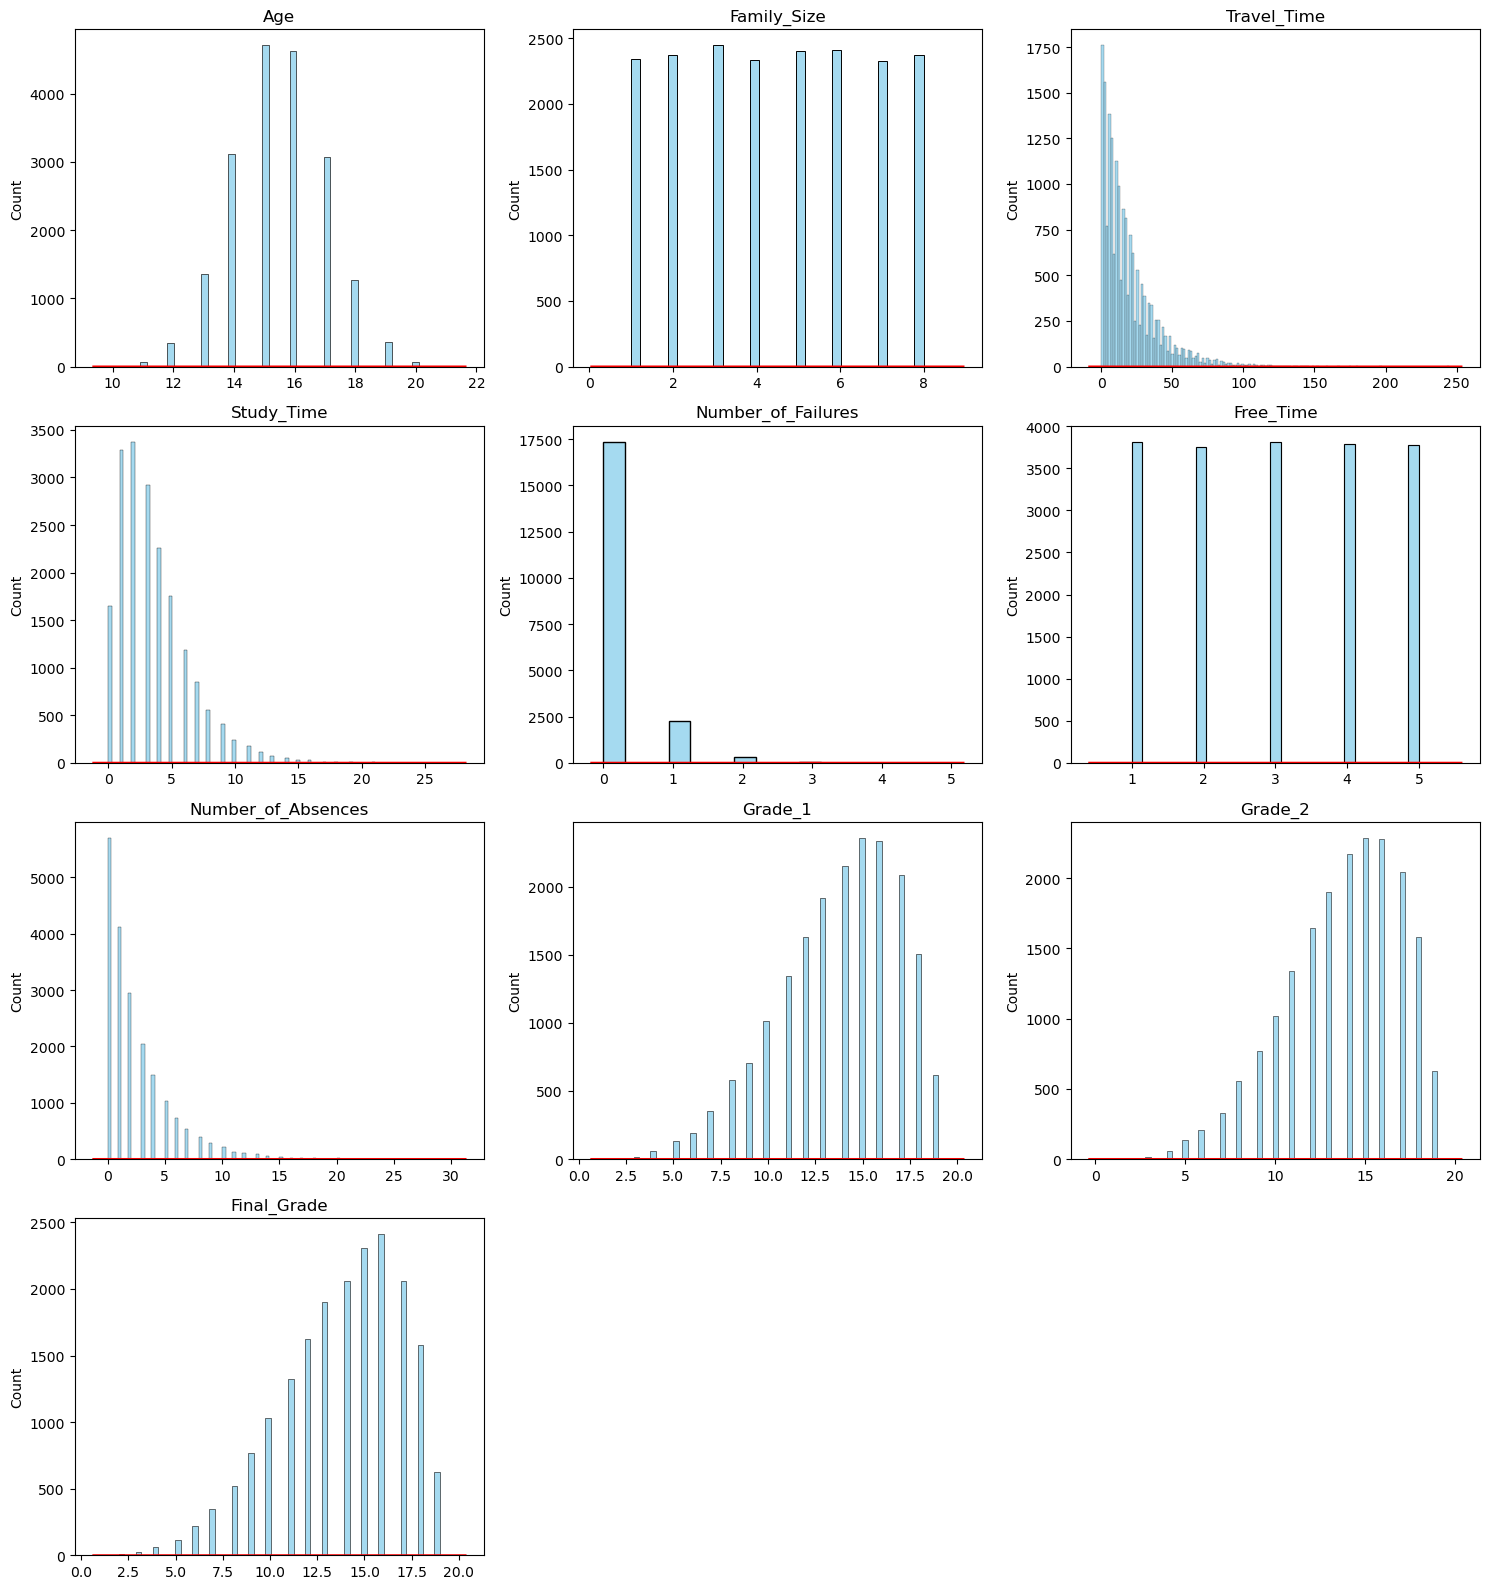

In [52]:
n_cols = 3
n_rows = (len(numeric_cols) - 1) // n_cols + 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))

# Flatten the axes array (in case it's 2D)
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, ax=axes[i], color='skyblue')
    sns.kdeplot(data=df, x=col, ax=axes[i], color='red')
    axes[i].set_title(col)
    axes[i].set_xlabel('') 

for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show();

### Some of the features in the student data set present a skewed distribution; it is one where the data values are not symmetrically distributed around the mean. Instead, they tend to trail off more sharply on one side than the other. This can occur due to various factors, including the presence of extreme values or outliers, but skewness can also arise from the inherent characteristics of the data itself.


### Looking for possible outliers in quantitative features

In [53]:

def detect_outliers(df, numeric_columns):
    """
    Identify outliers in specified numerical columns of a DataFrame using the IQR method.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the data.
    numeric_columns (list): A list of column names to check for outliers.

    Returns:
    str: A message indicating the number of columns with outliers and the percentage of outliers in each column,
         or a message stating that no columns have outliers.
    """
    
    outlier_dict = {}
    outlier_listing = {}
    counter = 0
    try:
        for column in numeric_columns:
            if column in df.columns:
                Q1 = df[column].quantile(0.25)
                Q3 = df[column].quantile(0.75)
                IQR = Q3 - Q1
            
                # Define the outlier bounds
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
            
                outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
                if len(outliers)> 0:
                # Store outliers in the dictionary
                    #outlier_listing[column]  = outliers.tolist()
                    outlier_dict[column] = round(len(outliers)/df.shape[0],2)#.tolist()
                    counter +=1
                else:
                    print(f"Info: {column} has no outliers.")
    
        #if counter == 0:
         #   return "No columns have outliers."
    
        return "There are {} columns with outliers. Each columns has the following % of outliers: {}".format(counter,outlier_dict)

    except Exception as e:
        return f"An error occurred: {str(e)}"


In [54]:
outlier_table = detect_outliers(df, numeric_cols)
print(outlier_table)

Info: Age has no outliers.
Info: Family_Size has no outliers.
Info: Free_Time has no outliers.
There are 7 columns with outliers. Each columns has the following % of outliers: {'Travel_Time': 0.05, 'Study_Time': 0.02, 'Number_of_Failures': 0.13, 'Number_of_Absences': 0.03, 'Grade_1': 0.01, 'Grade_2': 0.01, 'Final_Grade': 0.01}


### Looking for possible outliers in categorical features


In [55]:
import pandas as pd

def detect_categorical_outliers(df, categorical_columns, threshold=0.05):
    """
    Identify rare categories in specified categorical columns of a DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the data.
    categorical_columns (list): A list of column names to check for rare categories.
    threshold (float): The percentage threshold below which categories are considered outliers.

    Returns:
    dict: A dictionary with column names as keys and lists of rare categories as values,
          or a message stating that no rare categories were found.
    """
    outlier_dict = {}
    counter = 0
    
    try:
        for column in categorical_columns:
            if column in df.columns:

                category_counts = df[column].value_counts(normalize=True)
                
                rare_categories = category_counts[category_counts < threshold].index.tolist()
                
                if rare_categories:
                    outlier_dict[column] = rare_categories
                    counter+=1
                else:
                    print(f"Info: {column} has no outliers.")
        
        if not outlier_dict:
            return "No rare categories found in the specified columns."
        
        return "There is/are {} columns with outliers. Each columns has the following % outlier/s: {}".format(counter,outlier_dict)

    
    except Exception as e:
        return f"An error occurred: {str(e)}"



In [56]:
cat_var = df.select_dtypes(include='object').columns
outlier_table = detect_categorical_outliers(df, cat_var)
print(outlier_table)

Info: School has no outliers.
Info: Gender has no outliers.
Info: Address has no outliers.
Info: Parental_Status has no outliers.
Info: Mother_Education has no outliers.
Info: Father_Education has no outliers.
Info: Mother_Job has no outliers.
Info: Father_Job has no outliers.
Info: Reason_for_Choosing_School has no outliers.
Info: Guardian has no outliers.
Info: School_Support has no outliers.
Info: Family_Support has no outliers.
Info: Extra_Paid_Class has no outliers.
Info: Extra_Curricular_Activities has no outliers.
Info: Attended_Nursery has no outliers.
Info: Wants_Higher_Education has no outliers.
Info: Internet_Access has no outliers.
Info: In_Relationship has no outliers.
Info: Family_Relationship has no outliers.
Info: Weekend_Alcohol_Consumption has no outliers.
Info: Weekday_Alcohol_Consumption has no outliers.
Info: Health_Status has no outliers.
Info: Dropped_Out has no outliers.
There is/are 1 columns with outliers. Each columns has the following % outlier/s: {'Going_Ou

### Since both quantitaive and qualitative features present outliers, it is essential to carefully assess, handle, and evaluate the impact of these outliers to ensure robust model performance.

In [80]:
corr_check = df.copy()

In [87]:
df.Gender.unique()

array(['Female', 'Other', 'Male'], dtype=object)

In [82]:
df_enc = pd.get_dummies(corr_check, drop_first=True)

In [90]:
# Calculate the correlation matrix
correlation_matrix = df_enc.corr()

# Display the correlation matrix
correlation_matrix


,Age,Family_Size,Travel_Time,Study_Time,Number_of_Failures,Free_Time,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out,School_School B,School_School C,School_School D,Gender_Male,Gender_Other,Address_Suburban,Address_Urban,Parental_Status_Together,Mother_Education_Primary,Mother_Education_Secondary,Father_Education_Primary,Father_Education_Secondary,Mother_Job_Education,Mother_Job_Healthcare,Mother_Job_Service,Mother_Job_Technology,Mother_Job_Unemployed,Father_Job_Education,Father_Job_Healthcare,Father_Job_Service,Father_Job_Technology,Father_Job_Unemployed,Reason_for_Choosing_School_Home,Reason_for_Choosing_School_Other,Reason_for_Choosing_School_Reputation,Guardian_Mother,Guardian_Other,School_Support_Yes,Family_Support_Yes,Extra_Paid_Class_Yes,Extra_Curricular_Activities_Yes,Attended_Nursery_Yes,Wants_Higher_Education_Yes,Internet_Access_Yes,In_Relationship_Yes,Family_Relationship_Excellent,Family_Relationship_Good,Family_Relationship_Neutral,Family_Relationship_Very Bad,Going_Out_2.0,Going_Out_3.0,Going_Out_4.0,Going_Out_5.0,Going_Out_nan,Weekend_Alcohol_Consumption_Low,Weekend_Alcohol_Consumption_Medium,Weekend_Alcohol_Consumption_Very High,Weekday_Alcohol_Consumption_Low,Weekday_Alcohol_Consumption_Medium,Weekday_Alcohol_Consumption_Very High,Health_Status_Excellent,Health_Status_Good,Health_Status_Neutral,Health_Status_Very Bad
Age,1.000000,0.004695,-0.006898,0.005081,0.001486,0.000202,-0.002108,0.000211,0.000659,0.003246,0.012437,-0.009766,0.000437,0.005441,-0.015434,-0.004248,-0.001458,-0.004989,0.006949,-0.019080,0.004323,0.000885,0.000086,-0.003880,-0.010771,-0.012634,0.013064,0.015383,-0.004389,-0.000517,-0.011256,0.012428,-0.002786,0.005573,-0.014750,0.007028,0.010448,0.000520,0.004573,-0.006949,-0.000722,-0.015007,0.007816,0.005139,-0.007264,-0.013723,0.011040,-0.008179,0.022735,-0.006717,0.016976,-0.007202,-0.004511,-0.003297,0.000835,0.013521,-0.002761,-0.002116,-0.002820,0.008970,-0.003918,-0.004969,-0.004021,-0.009371,0.013747
Family_Size,0.004695,1.000000,-0.004167,0.011148,0.015739,-0.007847,-0.012916,0.002615,0.002077,0.012214,-0.002857,0.005678,-0.007936,0.000630,-0.003290,0.000567,-0.001865,-0.002530,-0.006076,0.005933,0.003703,0.012921,-0.003704,-0.002187,-0.006070,0.003247,0.020023,-0.009718,0.001198,-0.012252,0.003769,0.003704,-0.001554,-0.000686,0.014707,-0.001732,-0.000802,0.006120,0.007394,0.010422,0.008616,-0.000035,0.005132,-0.006845,-0.005453,-0.004513,0.003502,-0.001854,-0.016868,0.007354,-0.006924,0.005077,-0.002251,-0.003285,0.006959,0.006385,0.008406,0.002505,-0.003597,-0.000262,-0.008676,0.003198,0.002813,0.008529,-0.006467
Travel_Time,-0.006898,-0.004167,1.000000,0.009942,0.016082,0.009241,-0.010348,-0.001080,-0.009559,0.000918,0.010191,0.006551,-0.004774,-0.003070,0.007026,-0.007772,-0.004716,0.003639,0.000426,-0.004159,-0.007097,-0.008051,0.000740,0.006528,0.001883,-0.011369,-0.002566,0.004757,0.006981,-0.002884,-0.000612,-0.004011,0.002826,-0.002928,0.003872,-0.002812,0.000560,-0.007289,-0.009958,0.006190,0.004719,0.002903,-0.005629,-0.008123,-0.000707,0.002373,0.013594,-0.000292,-0.002121,-0.001272,0.001565,-0.005405,0.011178,-0.000899,-0.000058,-0.001208,0.020877,-0.012354,-0.017235,0.005835,-0.000542,-0.008768,0.004401,0.005590,0.000728
Study_Time,0.005081,0.011148,0.009942,1.000000,-0.010688,-0.010825,0.004672,-0.002271,0.003187,-0.008544,-0.009695,0.006005,-0.002915,-0.005322,-0.006577,0.003647,0.005571,-0.007997,0.015367,-0.014611,0.003597,0.003204,-0.003909,-0.000195,0.002544,-0.013730,0.003913,-0.000583,-0.011844,0.022540,-0.016955,-0.004737,0.007064,0.008418,0.019676,-0.014743,0.002142,-0.004102,0.011726,0.000678,-0.001903,-0.003598,-0.004930,-0.001790,0.004513,-0.000036,-0.003809,0.005282,-0.003896,0.003142,-0.005266,0.000696,0.002252,-0.001779,-0.005307,-0.003072,-0.002999,0.000916,0.001130,0.007336,-0.005929,0.013243,-0.009873,-0.002140,-0.008987
Number_of_Failures,0.001486,0.015739,0.016082,-0.010688,1.000000,-0.002801,-0.004560,0.005687,-0.006636,0.001511,0.004216

                                       Age  Family_Size  Travel_Time  \
Age                                    1.0          NaN          NaN   
Family_Size                            NaN          1.0          NaN   
Travel_Time                            NaN          NaN          1.0   
Study_Time                             NaN          NaN          NaN   
Number_of_Failures                     NaN          NaN          NaN   
...                                    ...          ...          ...   
Weekday_Alcohol_Consumption_Very High  NaN          NaN          NaN   
Health_Status_Excellent                NaN          NaN          NaN   
Health_Status_Good                     NaN          NaN          NaN   
Health_Status_Neutral                  NaN          NaN          NaN   
Health_Status_Very Bad                 NaN          NaN          NaN   

                                       Study_Time  Number_of_Failures  \
Age                                           NaN             

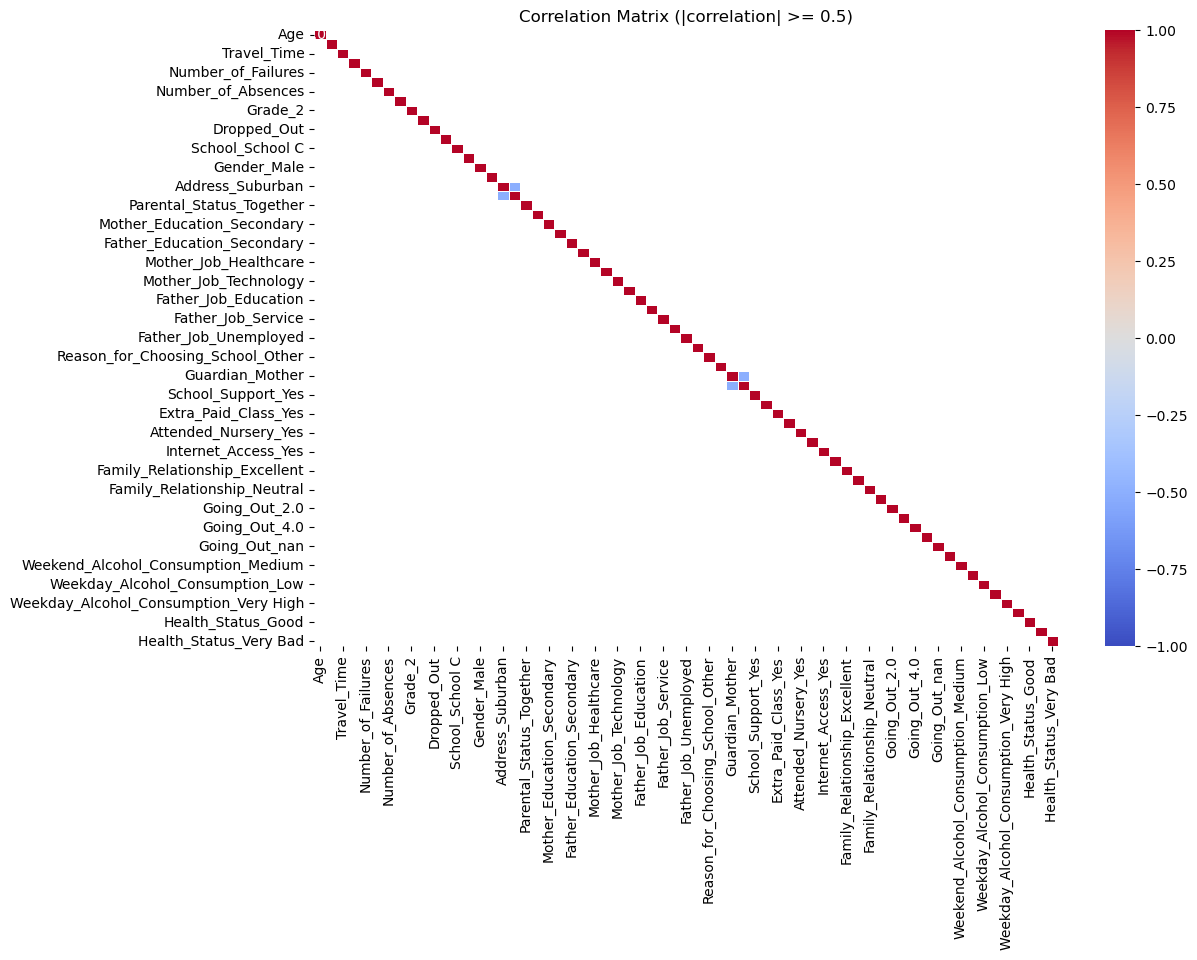

In [91]:
filtered_correlation_matrix = correlation_matrix[(correlation_matrix >= 0.5) | (correlation_matrix <= -0.5)]

# Display the filtered correlation matrix
print(filtered_correlation_matrix)

# Plot the filtered correlation matrix as a heatmap (optional)
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (|correlation| >= 0.5)')
plt.show()

## 3.Data Preparation

### Creating lists to group features relevant to the questions indentified in the business understanding step.

In [92]:
# Family Factors
family_factors = [
    'Family_Size',
    'Parental_Status',
    'Mother_Education',
    'Father_Education',
    'Mother_Job',
    'Father_Job',
    'Guardian',
    'Family_Relationship'
]

# Alcohol Consumption
alcohol_consumption = [
    'Weekend_Alcohol_Consumption',
    'Weekday_Alcohol_Consumption'
]

# Extra-Curricular Activities
extra_curricular_activities = [
    'Extra_Paid_Class',
    'Extra_Curricular_Activities',
    'Attended_Nursery',
    'Wants_Higher_Education'
]

# Student Support Systems
student_support_systems = [
    'School_Support',
    'Family_Support',
    'Travel_Time',
    'Study_Time',
    'Number_of_Failures',
    'Internet_Access',
    'In_Relationship',
    'Free_Time',
    'Going_Out',
    'Health_Status',
    'Number_of_Absences'
]


### Binary Encoding for the target variable Dropped_Out

In [93]:
df['Dropped_Out'] = df['Dropped_Out'].map({'Yes': 1, 'No': 0})


In [94]:
family_factors = [
    'Family_Size',
    'Parental_Status',
    'Mother_Education',
    'Father_Education',
    'Mother_Job',
    'Father_Job',
    'Guardian',
    'Family_Relationship'
]


### As observed in the EDA, the dataset presents missing values both in the numerical and categorical features. The numerical features have a small percentage of missing values (<=5%), thus they will be imputed using the median. Next we proceed with one-hot encoding for the categorical features.Using the the pd.get_dummies method automatically returns a DataFrame that includes the original non-categorical columns along with the newly created dummy variables for the categorical columns.

In [103]:
subset_columns = ['Age','Family_Size','Study_Time','Travel_Time','Free_Time','Final_Grade','Grade_1','Grade_2']
#(df.isnull().mean() * 100)[df.isnull().mean() * 100 > 0]
df[subset_columns] = df[subset_columns].fillna(df[subset_columns].median())

### Hot-Encoding Categorical Variables

In [96]:
# df_cleaned = df.dropna(subset=(['Family_Size', 'Final_Grade', 
#                         'Grade_1', 'Travel_Time', 'Study_Time', 'Age', 'Free_Time']))

In [98]:
df_encoded = pd.get_dummies(df, 
                            columns=df.select_dtypes(include='object').columns, 
                            dummy_na=True, 
                            drop_first=True,
                            prefix=df.select_dtypes(include='object').columns)

### After one-hot encoding, the final dataset has 111 columns and 13,852 rows, which makes it well within the 10:1 rule of thumb. The 10:1 rule suggests a dataset should have at least 10 rows of data for each feature (column) to ensure that the model has enough data to generalize effectively.

## 4.Data Modeling

In [99]:
df_encoded.head()

,Age,Family_Size,Travel_Time,Study_Time,Number_of_Failures,Free_Time,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out,School_School B,School_School C,School_School D,School_nan,Gender_Male,Gender_Other,Gender_nan,Address_Suburban,Address_Urban,Address_nan,Parental_Status_Together,Parental_Status_nan,Mother_Education_Primary,Mother_Education_Secondary,Mother_Education_nan,Father_Education_Primary,Father_Education_Secondary,Father_Education_nan,Mother_Job_Education,Mother_Job_Healthcare,Mother_Job_Service,Mother_Job_Technology,Mother_Job_Unemployed,Mother_Job_nan,Father_Job_Education,Father_Job_Healthcare,Father_Job_Service,Father_Job_Technology,Father_Job_Unemployed,Father_Job_nan,Reason_for_Choosing_School_Home,Reason_for_Choosing_School_Other,Reason_for_Choosing_School_Reputation,Reason_for_Choosing_School_nan,Guardian_Mother,Guardian_Other,Guardian_nan,School_Support_Yes,School_Support_nan,Family_Support_Yes,Family_Support_nan,Extra_Paid_Class_Yes,Extra_Paid_Class_nan,Extra_Curricular_Activities_Yes,Extra_Curricular_Activities_nan,Attended_Nursery_Yes,Attended_Nursery_nan,Wants_Higher_Education_Yes,Wants_Higher_Education_nan,Internet_Access_Yes,Internet_Access_nan,In_Relationship_Yes,In_Relationship_nan,Family_Relationship_Excellent,Family_Relationship_Good,Family_Relationship_Neutral,Family_Relationship_Very Bad,Family_Relationship_nan,Going_Out_2.0,Going_Out_3.0,Going_Out_4.0,Going_Out_5.0,Going_Out_nan,Going_Out_nan,Weekend_Alcohol_Consumption_Low,Weekend_Alcohol_Consumption_Medium,Weekend_Alcohol_Consumption_Very High,Weekend_Alcohol_Consumption_nan,Weekday_Alcohol_Consumption_Low,Weekday_Alcohol_Consumption_Medium,Weekday_Alcohol_Consumption_Very High,Weekday_Alcohol_Consumption_nan,Health_Status_Excellent,Health_Status_Good,Health_Status_Neutral,Health_Status_Very Bad,Health_Status_nan
0,13.0,1.0,14.0,5.0,0,5.0,1,16.0,14.0,16.0,1,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
1,14.0,4.0,7.0,4.0,0,3.0,3,15.0,16.0,15.0,0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,True,False,True,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False
2,18.0,5.0,14.0,1.0,0,2.0,0,17.0,13.0,8.0,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False
3,18.0,7.0,41.0,4.0,1,5.0,6,14.0,16.0,16.0,0,True,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,True,False,False,False
4,16.0,8.0,39.0,7.0,2,4.0,2,16.0,13.0,15.0,0,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,Fal

In [67]:
family_factors

['Family_Size',
 'Parental_Status',
 'Mother_Education',
 'Father_Education',
 'Mother_Job',
 'Father_Job',
 'Guardian',
 'Family_Relationship']

In [109]:
# Step 1: One-Hot Encoding categorical variables
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_encoded = pd.get_dummies(df.drop(columns=['Dropped_Out']), dummy_na=True,drop_first=True)  # Drop target and encode
y = df['Dropped_Out']

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 3: Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

#rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Step 5: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8975
Classification Report:
               precision    recall  f1-score   support

          No       0.90      1.00      0.95      3590
         Yes       0.00      0.00      0.00       410

    accuracy                           0.90      4000
   macro avg       0.45      0.50      0.47      4000
weighted avg       0.81      0.90      0.85      4000

Confusion Matrix:
 [[3590    0]
 [ 410    0]]


In [108]:
df['Dropped_Out'].value_counts(normalize=True)

Dropped_Out
No     0.90055
Yes    0.09945
Name: proportion, dtype: float64

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

# Splitting your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df['Dropped_Out'], test_size=0.2, random_state=42)

# Random Forest with class_weight='balanced'
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_classifier.predict(X_test)
y_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]

# Model evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("Random Forest AUC-ROC:", roc_auc_score(y_test, y_prob_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

          No       0.90      0.98      0.94      3590
         Yes       0.10      0.01      0.03       410

    accuracy                           0.89      4000
   macro avg       0.50      0.50      0.48      4000
weighted avg       0.82      0.89      0.85      4000

Random Forest Confusion Matrix:
[[3536   54]
 [ 404    6]]
Random Forest AUC-ROC: 0.505921258237652


In [117]:
#df['Dropped_Out'] = df['Dropped_Out'].map({'Yes': 1, 'No': 0})
y_train = y_train.map({'Yes':1,'No':0})
y_test  = y_test.map({'Yes':1,'No':0})

In [118]:
from imblearn.over_sampling import SMOTE

# Oversample with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# XGBoost with oversampled data
xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(X_resampled, y_resampled)

# Predictions
y_pred_xgb_smote = xgb_classifier.predict(X_test)
y_prob_xgb_smote = xgb_classifier.predict_proba(X_test)[:, 1]

# Model evaluation
print("XGBoost (with SMOTE) Classification Report:")
print(classification_report(y_test, y_pred_xgb_smote))

print("XGBoost (with SMOTE) Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb_smote))

print("XGBoost (with SMOTE) AUC-ROC:", roc_auc_score(y_test, y_prob_xgb_smote))


ValueError: Input y contains NaN.